# **#前処理**

In [1]:
import pandas as pd

# 学習用データとテストデータを読み込みます
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')

# 学習用データの最初の数行を表示します
print("学習用データ:")
print(train_data.head())

# 学習用データの概要統計量を表示します
print("\n学習用データの概要:")
print(train_data.describe())

# 学習用データに欠損値があるかを確認します
print("\n学習用データの欠損値:")
print(train_data.isnull().sum())

# テストデータの最初の数行を表示します
print("\nテストデータ:")
print(test_data.head())

# テストデータの欠損値を確認します
print("\nテストデータの欠損値:")
print(test_data.isnull().sum())


学習用データ:
   Unnamed: 0   mpg  cylinders  displacement horsepower  weight  acceleration  \
0           0  39.4          4          85.0         70    2070          18.6   
1           3  18.0          6         171.0         97    2984          14.5   
2           9  32.7          6         168.0        132    2910          11.4   
3          11  38.1          4          89.0         60    1968          18.8   
4          13  28.0          4          98.0         80    2164          15.0   

   model year  origin               car name  
0          78       3         datsun b210 gx  
1          75       1             ford pinto  
2          80       3          datsun 280-zx  
3          80       3  toyota corolla tercel  
4          72       1        dodge colt (sw)  

学習用データの概要:
       Unnamed: 0         mpg   cylinders  displacement       weight  \
count  199.000000  199.000000  199.000000    199.000000   199.000000   
mean   200.170854   22.997990    5.527638    200.889447  3063.32663

In [2]:
import pandas as pd
import numpy as np

# データの読み込み
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/test.tsv', sep='\t')

# horsepower列の欠損値処理: '?'をNaNに置き換え、その後数値型に変換します
train_data['horsepower'].replace('?', np.nan, inplace=True)
train_data['horsepower'] = train_data['horsepower'].astype(float)
test_data['horsepower'].replace('?', np.nan, inplace=True)
test_data['horsepower'] = test_data['horsepower'].astype(float)

# 欠損値を列の平均値で補完します
train_data['horsepower'].fillna(train_data['horsepower'].mean(), inplace=True)
test_data['horsepower'].fillna(test_data['horsepower'].mean(), inplace=True)

# カテゴリカルデータのエンコーディング (One-Hot Encoding)
train_data = pd.get_dummies(train_data, columns=['origin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['origin'], drop_first=True)

# 不要なカラムを削除します
train_data.drop(['Unnamed: 0', 'car name'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0', 'car name'], axis=1, inplace=True)

# 前処理結果を確認します
print("前処理後の学習データ:")
print(train_data.head())

print("\n前処理後のテストデータ:")
print(test_data.head())


前処理後の学習データ:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  39.4          4          85.0        70.0    2070          18.6   
1  18.0          6         171.0        97.0    2984          14.5   
2  32.7          6         168.0       132.0    2910          11.4   
3  38.1          4          89.0        60.0    1968          18.8   
4  28.0          4          98.0        80.0    2164          15.0   

   model year  origin_2  origin_3  
0          78     False      True  
1          75     False     False  
2          80     False      True  
3          80     False      True  
4          72     False     False  

前処理後のテストデータ:
   cylinders  displacement  horsepower  weight  acceleration  model year  \
0          8         350.0       180.0    4499          12.5          73   
1          4         156.0       105.0    2745          16.7          78   
2          6         156.0       108.0    2930          15.5          76   
3          4         108.0       

# **#モデルの構築**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 特徴量とターゲットを定義
X = train_data.drop('mpg', axis=1)  # 特徴量
y = train_data['mpg']               # 予測対象（燃料消費量）

# 訓練データと検証データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの構築と訓練
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 検証データでの予測
y_pred = model.predict(X_valid)

# モデルの評価
mae = mean_absolute_error(y_valid, y_pred)
print(f'検証データでのMAE: {mae}')

# テストデータでの予測
X_test = test_data  # テストデータの特徴量
test_predictions = model.predict(X_test)

# テストデータの予測結果を表示
print("テストデータでの予測結果:")
print(test_predictions)

検証データでのMAE: 2.0341999999999985
テストデータでの予測結果:
[12.9   23.015 21.27  33.582 35.75  15.984 29.414 25.085 36.243 19.297
 14.981 17.88  38.033 29.269 36.064 28.877 37.451 33.636 34.31  20.082
 14.555 37.489 19.53  34.74  27.957 17.341 23.988 16.945 26.866 37.684
 15.425 29.386 28.742 20.217 23.25  17.002 25.559 25.175 30.963 14.821
 16.432 28.006 37.166 31.005 15.105 16.782 18.961 25.712 18.781 12.12
 25.857 33.851 22.484 28.867 33.21  25.92  27.53  27.173 19.777 33.564
 19.029 28.071 38.876 14.881 24.89  35.213 28.36  34.949 24.718 30.92
 24.007 19.872 37.085 27.9   16.224 34.016 28.785 25.259 14.18  18.282
 28.186 20.24  23.278 18.065 23.943 18.995 13.89  28.269 26.716 25.071
 35.591 25.008 13.645 28.613 17.876 18.199 34.051 26.978 29.578 14.54
 15.658 27.157 37.488 39.736 13.7   18.059 19.278 24.659 20.691 15.333
 30.117 19.615 14.474 23.308 34.349 19.482 20.659 14.3   16.933 12.42
 29.824 19.246 23.607 24.569 26.547 18.38  14.262 13.435 17.248 18.444
 23.095 16.779 30.096 15.882 18.791 

In [4]:
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータのグリッドを設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# ランダムフォレストモデルをGridSearchCVでラップ
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=7, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# グリッドサーチを実行
grid_search.fit(X_train, y_train)

# 最良のハイパーパラメータを表示
print(f'最良のパラメータ: {grid_search.best_params_}')

# 最良モデルで予測と評価
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_valid)
mae_best_rf = mean_absolute_error(y_valid, y_pred_best_rf)
print(f'チューニング後のランダムフォレスト - 検証データでのMAE: {mae_best_rf}')


Fitting 7 folds for each of 108 candidates, totalling 756 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

In [5]:
# 特徴量の重要度を取得して表示
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance = sorted(zip(importances, feature_names), reverse=True)
for importance, name in feature_importance:
    print(f"{name}: {importance}")


displacement: 0.46866092443967095
weight: 0.21000700236072048
cylinders: 0.12824489821504895
model year: 0.1021991799159
horsepower: 0.06303700962427773
acceleration: 0.021873008402688136
origin_3: 0.003921055740113364
origin_2: 0.0020569213015804253


In [6]:
from sklearn.model_selection import cross_val_score

# クロスバリデーションでモデルを評価
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
print(f'10分割交差検証のMAE: {-cv_scores.mean()}')


10分割交差検証のMAE: 2.0256605263157903


# **#可視化**

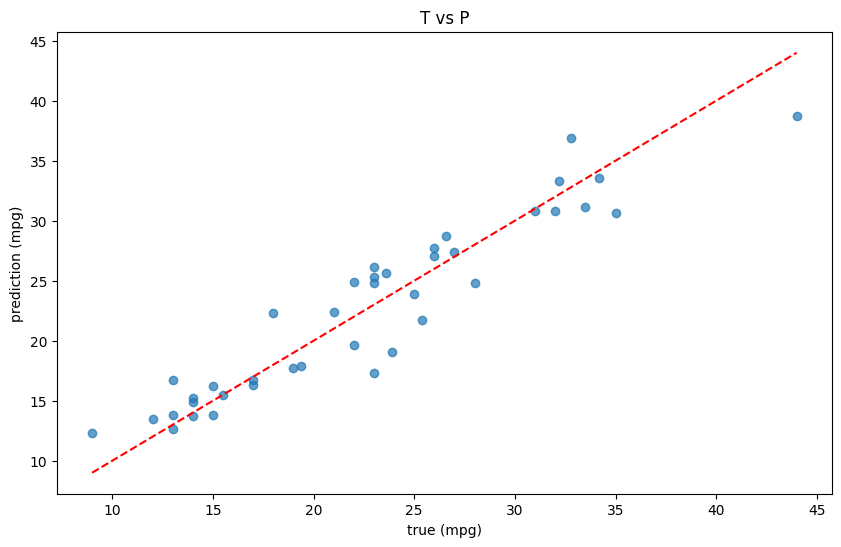

In [7]:
import matplotlib.pyplot as plt

# 検証データの予測結果 vs 実際の値をプロット
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.7)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')  # 完全一致を表すライン
plt.xlabel('true (mpg)')
plt.ylabel('prediction (mpg)')
plt.title('T vs P')
plt.show()


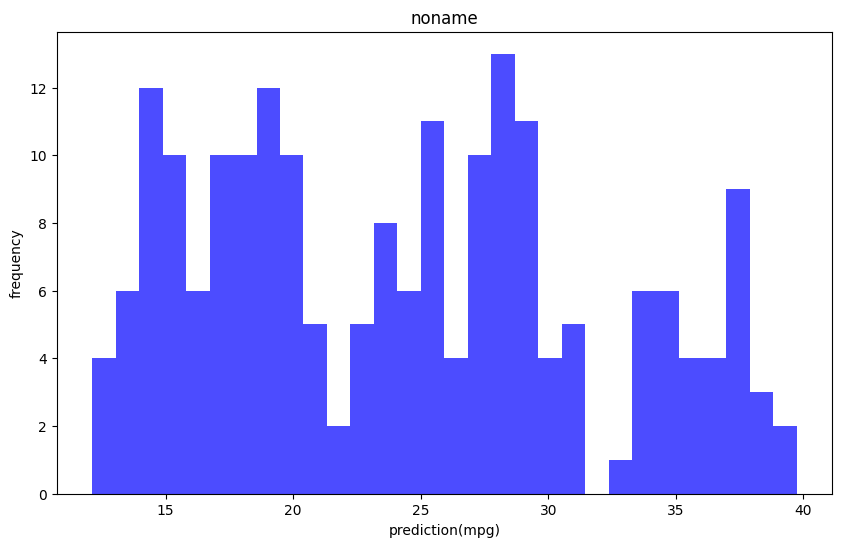

In [8]:
# テストデータの予測結果のヒストグラムをプロット
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=30, alpha=0.7, color='blue')
plt.xlabel('prediction(mpg)')
plt.ylabel('frequency')
plt.title('noname')
plt.show()


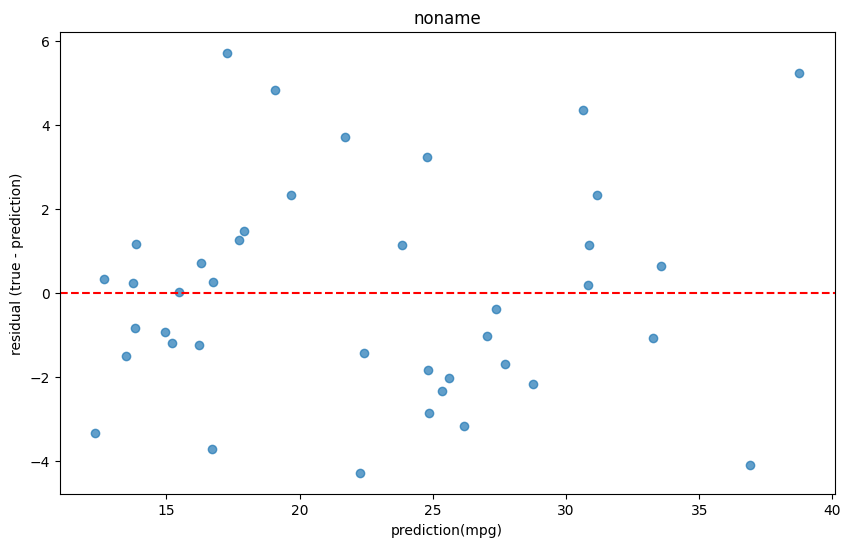

In [9]:
# 残差プロット
residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('prediction(mpg)')
plt.ylabel('residual (true - prediction)')
plt.title('noname')
plt.show()


# **#データの保存**

In [15]:
import pandas as pd

# train.tsvファイルを読み込み、一列目（id）だけを抽出
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/test.tsv', sep='\t')
id_column = train_data.iloc[:, 0]  # 一列目を抽出

# id列と予測結果を結合して提出用ファイルを作成
submission = pd.DataFrame({
    'id': id_column,
    'mpg': test_predictions  # ランダムフォレストで予測したmpg
})

# CSVファイルとして保存（提出用）
submission.to_csv('submission.csv', index=False, sep=',')


In [16]:
import pandas as pd

# test.tsvファイルを読み込み、一列目（id）だけを抽出
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/test.tsv', sep='\t')
id_column = test_data.iloc[:, 0]  # 一列目を抽出

# id列と予測結果を結合して提出用ファイルを作成
submission = pd.DataFrame({
    'id': id_column,
    'mpg': test_predictions  # ランダムフォレストで予測したmpg
})

# CSVファイルとして保存（提出用）
submission.to_csv('submission.csv', index=False, sep=',')

# ヘッダーを削除して数値データのみを新しいファイルに保存
submission.to_csv('submission_no_header.csv', index=False, header=False)
